# Modeling Exercises

### K-Means

In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env
# from acquire import get_mallcustomer_data()

import warnings
warnings.filterwarnings("ignore")

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#### 1. Clustering with the Iris Dataset

Perform clustering on the iris dataset.

Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [4]:
# define independent variables for k-means

X = iris[['sepal_length', 'petal_length']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [5]:
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
# look at the head
X_scaled.head()

,sepal_length,petal_length
1,0.222222,0.067797
2,0.166667,0.067797
3,0.111111,0.050847
4,0.083333,0.084746
5,0.194444,0.067797


In [7]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [8]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
56,5.7,2.8,4.5,1.3,versicolor,2
35,4.9,3.1,1.5,0.2,setosa,1
141,6.7,3.1,5.6,2.4,virginica,0
64,6.1,2.9,4.7,1.4,versicolor,2
62,5.9,3.0,4.2,1.5,versicolor,2
46,4.8,3.0,1.4,0.3,setosa,1
115,5.8,2.8,5.1,2.4,virginica,2
118,7.7,3.8,6.7,2.2,virginica,0
20,5.1,3.8,1.5,0.3,setosa,1
59,6.6,2.9,4.6,1.3,versicolor,0


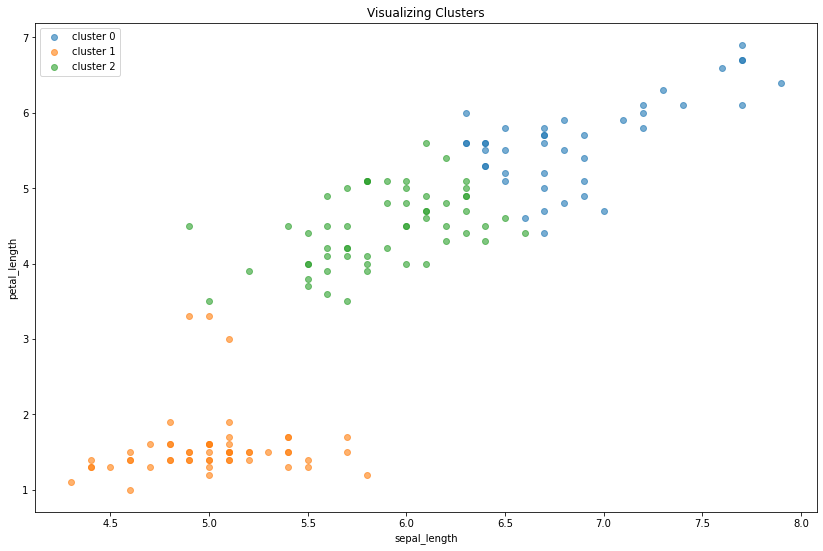

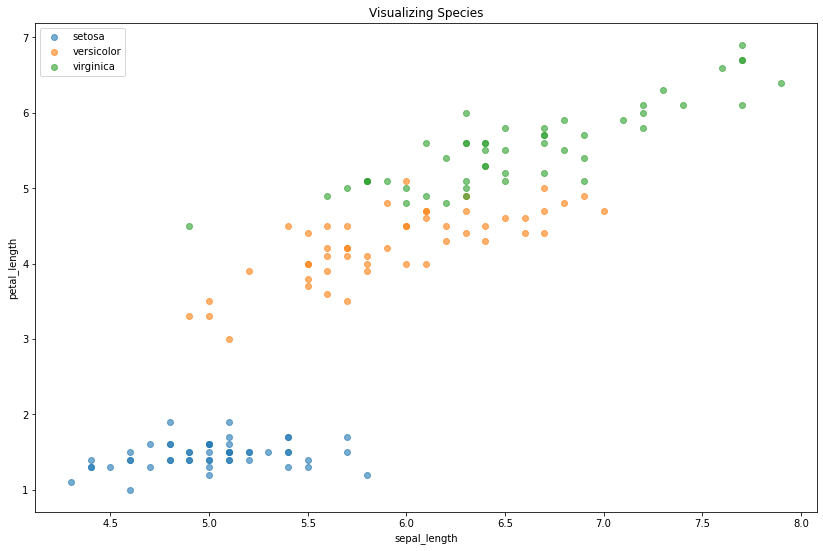

In [9]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_length, subset.petal_length, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()

In [10]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_length,petal_length
0,0.714770,0.782968
1,0.196017,0.094979
2,0.439484,0.588983


In [11]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,6.873171,5.619512
1,5.005660,1.560377
2,5.882143,4.475000


Text(0.5, 1.0, 'Visualizing Cluster Centers')

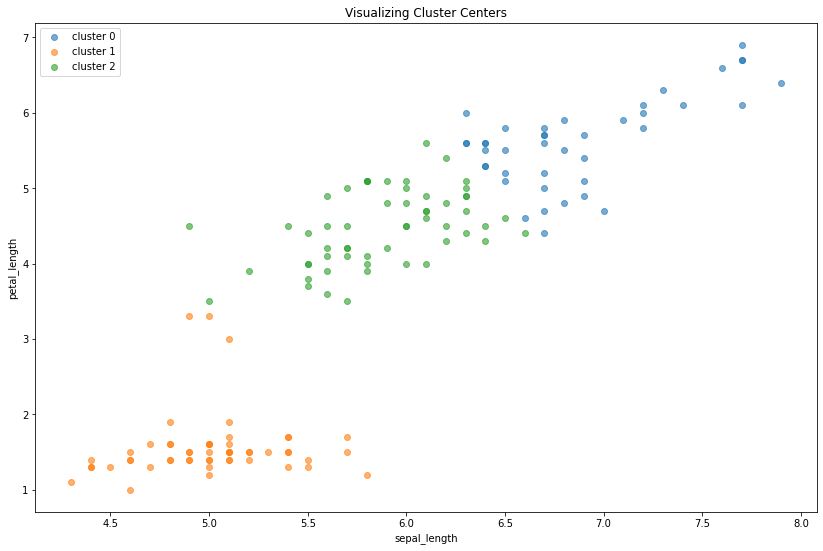

In [12]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

In [13]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

5.3260673221799

In [14]:
# intertia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.733349259374731

In [15]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

1.78817533222374

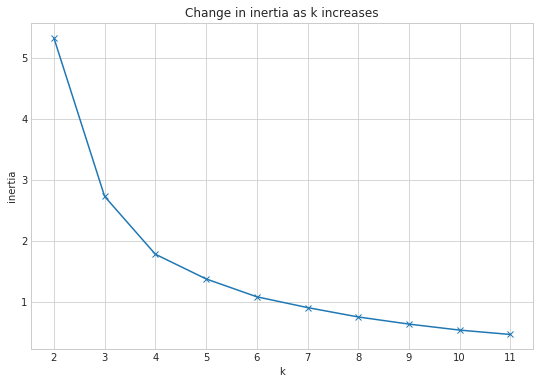

In [16]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

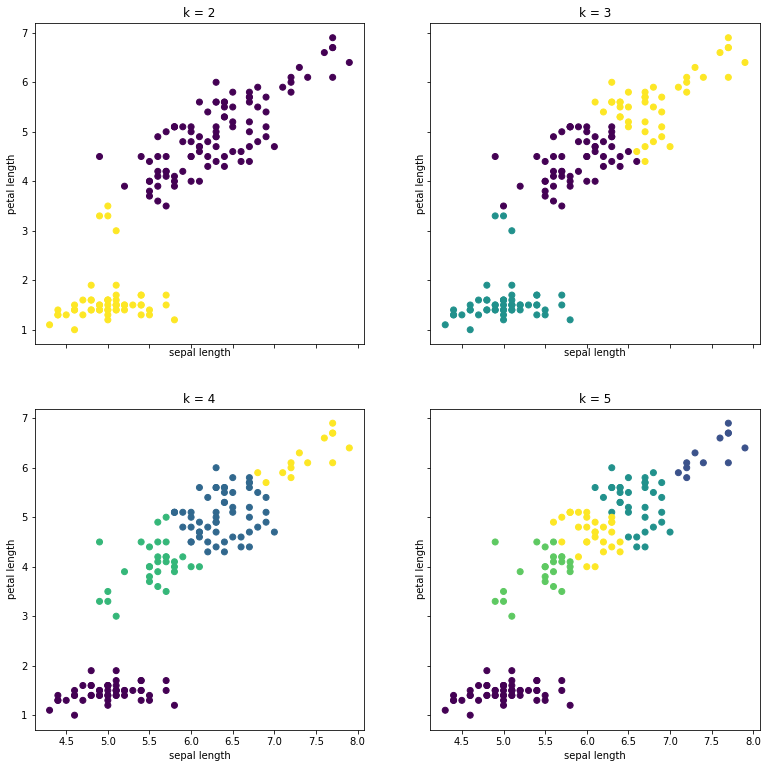

In [17]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [18]:
# Creating more features to repeat clustering with
# Feature Engineering
iris["sepal_area"] = iris.sepal_length * iris.sepal_width
iris["petal_area"] = iris.petal_length * iris.petal_width

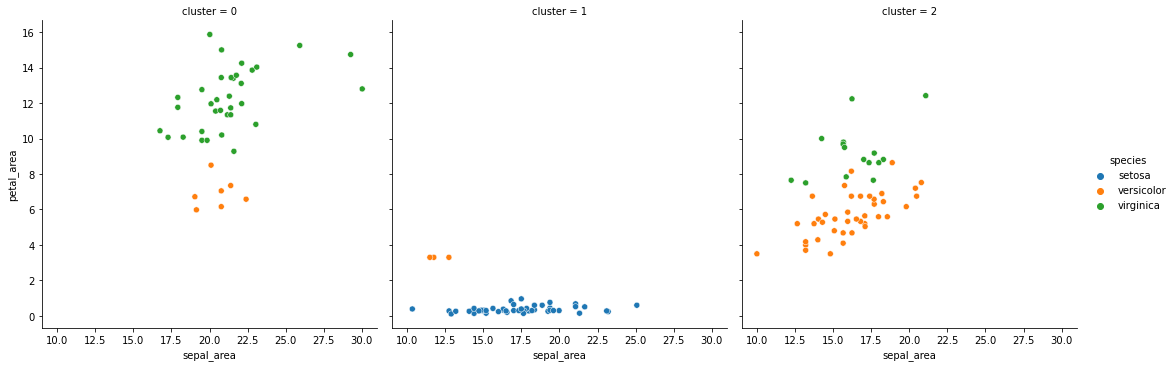

In [19]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=iris)

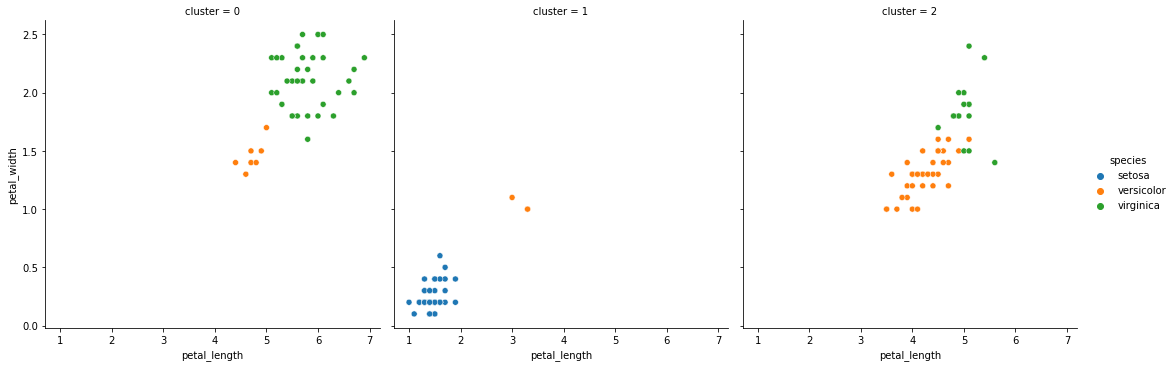

In [20]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="petal_length", y="petal_width", hue="species", col="cluster", data=iris)

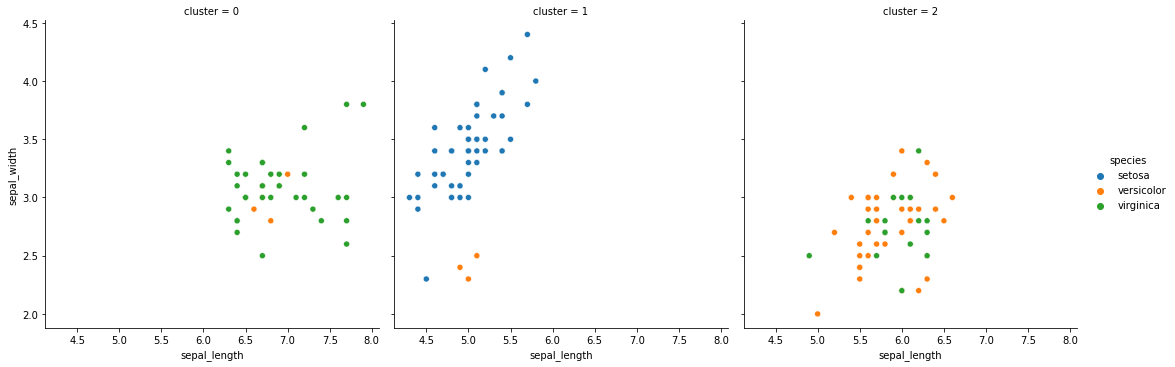

In [21]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_length", y="sepal_width", hue="species", col="cluster", data=iris)

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [22]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [23]:
# acquire our dataframe
df = get_mallcustomer_data()

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [26]:
# define independent variables for k-means
X = df[['annual_income', 'spending_score']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [27]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [28]:
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [29]:
# look at it
X_scaled.head()

,annual_income,spending_score
1,0.000000,0.387755
2,0.000000,0.816327
3,0.008197,0.051020
4,0.008197,0.775510
5,0.016393,0.397959


In [30]:
#Look at 15 random entries in df
df.sample(15)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
169,Female,36,87,27,2
67,Female,43,48,50,1
112,Female,19,63,54,1
89,Female,34,58,60,1
117,Female,63,65,43,1
34,Male,18,33,92,4
35,Female,49,33,14,0
162,Female,29,79,83,3
12,Female,35,19,99,4


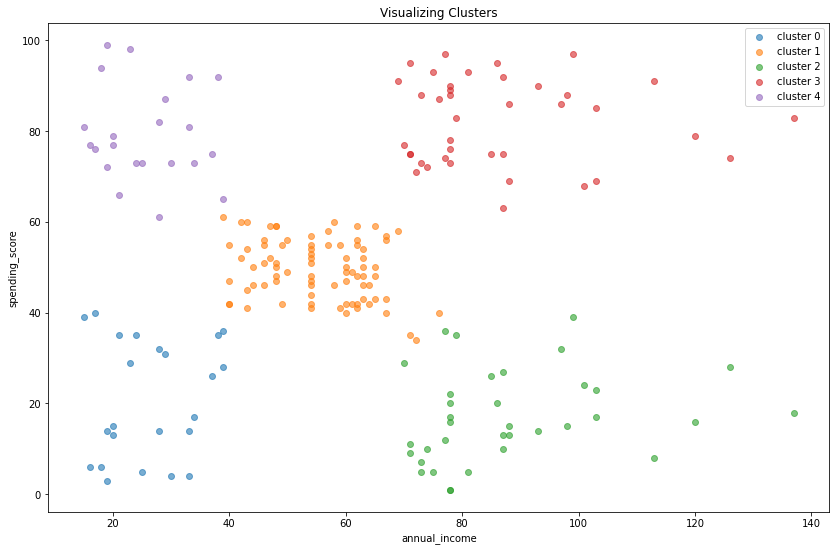

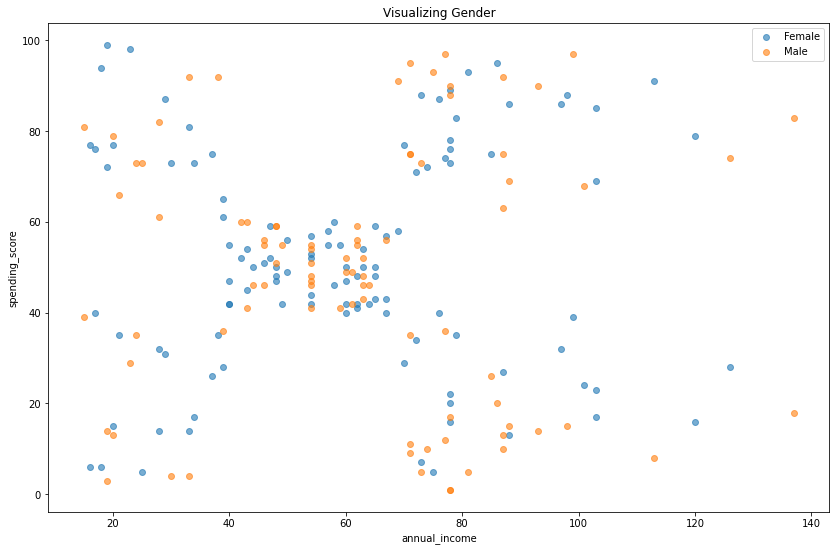

In [31]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in df.groupby('gender'):
    plt.scatter(subset.annual_income, subset.spending_score, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title('Visualizing Gender')
plt.show()


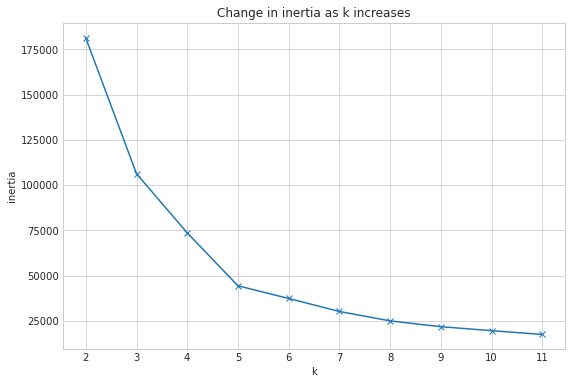

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

- Cluster 0: Low income, low spending score
- Cluster 1: Middle income, middle spending score
- Cluster 2: High income, low spending score
- Cluster 3: High income, high spending score
- Cluster 4: Low income, high spending score    

-Males and females are pretty spread throughout each spending and earning group

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

Bonus:

- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data. 
- c) Write down the takeaways from this exercise.

In [33]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing'    

csv_export_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()


,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


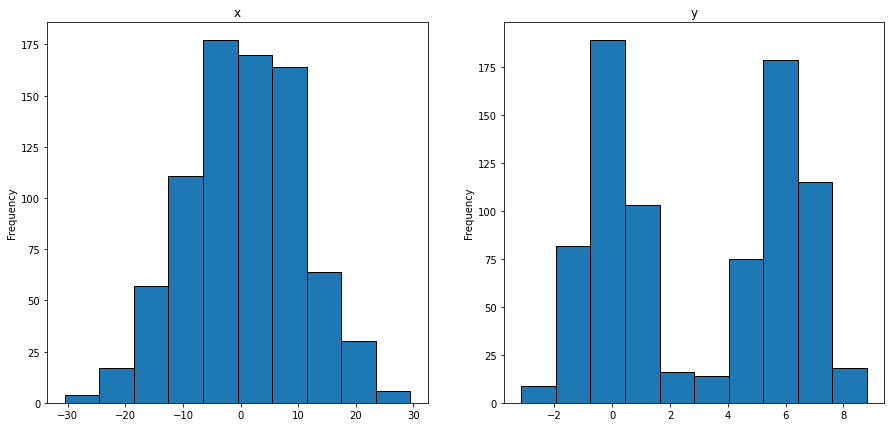

In [34]:
# Looking at the data 
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for ax, col in zip(axs, df_googlesheet.select_dtypes('number')):
    df_googlesheet[col].plot.hist(ax=ax, title=col, ec='black')

In [35]:
# define independent variables for k-means: Not scaling
X = df_googlesheet[['x', 'y']]

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [37]:
X['cluster'] = kmeans.predict(X)
X.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0


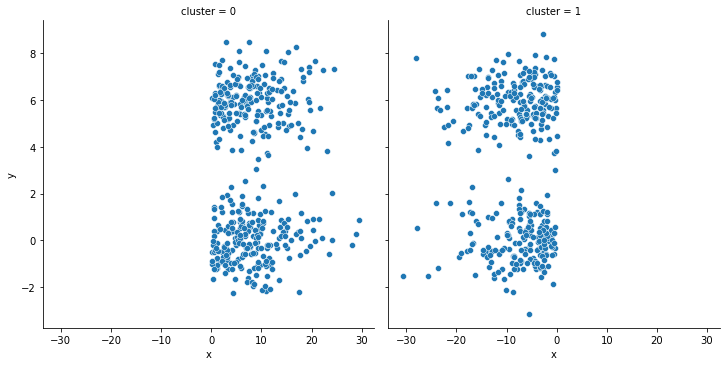

In [38]:
# visualize unscaled clusters
sns.relplot(x='x', y='y', col="cluster", data=X)

In [39]:
#Now let's try scaling the data

# Scale the datasets

X = df_googlesheet[['x', 'y']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
df_googlesheet['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [40]:
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [41]:
# make a new column names cluster in iris and X_scaled dataframe

df_googlesheet['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

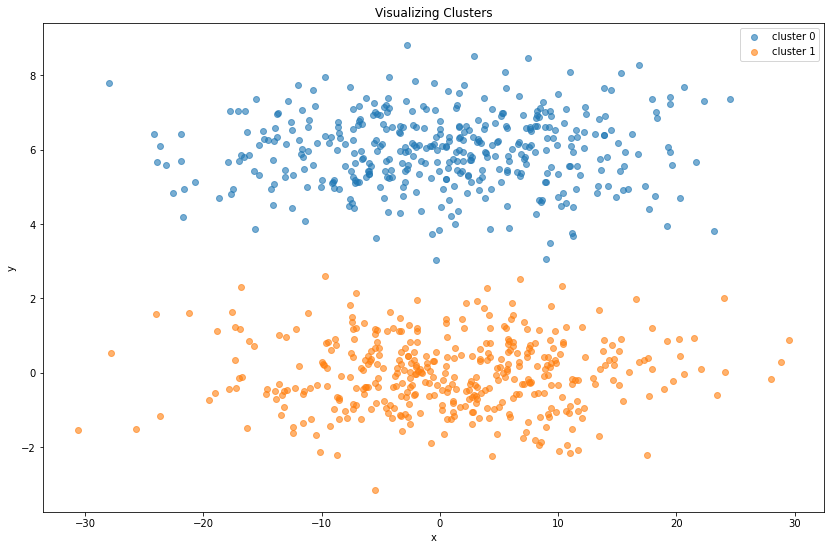

In [42]:
plt.figure(figsize=(14, 9))

for cluster, subset in df_googlesheet.groupby('cluster'):
    plt.scatter(subset.x, subset.y, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Clusters')
plt.show()



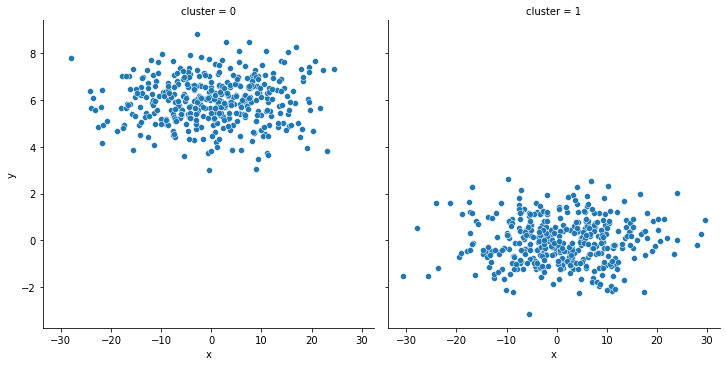

In [43]:
# visualize unscaled clusters
sns.relplot(x='x', y='y', col="cluster", data=df_googlesheet)

In [44]:
df_googlesheet.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,1
4,17.283668,0.344804,1


In [45]:
#Scaled data clustered together more nicely and was easier to visualize relationships